In [28]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./sourcecodetestt.csv')

In [ ]:
df = pd

In [3]:
df = df[["source", "label"]]

In [4]:
df

,source,label
0,package latexstudio.editor;,declaration
1,import javax.swing.SwingUtilities;,declaration
2,import latexstudio.editor.remote.Cloud;,declaration
3,import latexstudio.editor.remote.DbxUtil;,declaration
4,public class DbxAutoSync implements Runnable {,declaration
...,...,...
557,"jLabel2.setText(""of "" + pdfDisplay.getTotalPag...",expression
558,void writeProperties(java.util.Properties p) {,declaration
559,"p.setProperty(""version"", ""1.0"");",expression
560,void readProperties(java.util.Properties p) {,declaration


In [5]:
pd.unique(df['label'])

array(['declaration', 'expression', 'control'], dtype=object)

In [6]:
df = df.replace({'declaration': 0, 'expression': 1, 'control': 2})

In [7]:
df

,source,label
0,package latexstudio.editor;,0
1,import javax.swing.SwingUtilities;,0
2,import latexstudio.editor.remote.Cloud;,0
3,import latexstudio.editor.remote.DbxUtil;,0
4,public class DbxAutoSync implements Runnable {,0
...,...,...
557,"jLabel2.setText(""of "" + pdfDisplay.getTotalPag...",1
558,void writeProperties(java.util.Properties p) {,0
559,"p.setProperty(""version"", ""1.0"");",1
560,void readProperties(java.util.Properties p) {,0


In [8]:
tuples_list = [(row.label, row.source) for row in df.itertuples()]

In [9]:
tuples_list[0]

(0, 'package latexstudio.editor;')

In [12]:
from torchtext.data import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

tokenizer = get_tokenizer("basic_english")

def build_vocab(datasets):
    for _, text in datasets:
        yield tokenizer(text)

vocab = build_vocab_from_iterator(build_vocab(tuples_list), specials=["<UNK>"])
vocab.set_default_index(vocab["<UNK>"])

In [14]:
len(vocab)

587

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from torch.utils.data import DataLoader
from torchtext.data.functional import to_map_style_dataset

In [17]:
vectorizer = CountVectorizer(vocabulary=vocab.get_itos(), tokenizer=tokenizer)

In [30]:
X = vectorizer.transform([tuples_list[0][1]]).todense()
X = np.array(X)
X = X[0]
print(X.shape)
print(X)

(587,)
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0

In [34]:
import torch
import torch.nn as nn

In [45]:
final_dataset_list = []
for inx in range(len(tuples_list)):
    Y, X = tuples_list[inx]
    
    # convert the string into fixed size array
    X = vectorizer.transform([X]).todense()
    X = np.array(X)
    X = X[0]
    X = torch.Tensor(X)
    
    # convert the int index into class of one hot
    Y = torch.Tensor([Y]).to(torch.int64)
    Y = nn.functional.one_hot(Y, num_classes = 3)
    Y = Y[0]
    final_dataset_list.append((X, Y))
print(len(final_dataset_list))

562


In [46]:
(final_dataset_list[0][0].shape, final_dataset_list[0][1].shape)

(torch.Size([587]), torch.Size([3]))

In [47]:
(final_dataset_list[0][0].shape, final_dataset_list[0][1])

(torch.Size([587]), tensor([1, 0, 0]))

In [49]:
XTNS = torch.stack([x[0] for x in final_dataset_list])
YTNS = torch.stack([x[1] for x in final_dataset_list])

print(XTNS.shape, YTNS.shape)

torch.Size([562, 587]) torch.Size([562, 3])


In [51]:
from torch.utils.data import TensorDataset

dataset = TensorDataset(XTNS, YTNS)

In [52]:
len(dataset)

562

In [53]:
for x,y in dataset:
    print(x)
    print(y)
    break

tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 

In [58]:
class TextClassifier(nn.Module):
    def __init__(self):
        super(TextClassifier, self).__init__()
        self.layer_1 = nn.Linear(587, 256)
        self.layer_1a = nn.LeakyReLU()

        self.layer_2 = nn.Linear(256, 64)
        self.layer_2a = nn.LeakyReLU()

        self.layer_3 = nn.Linear(64, 3)
        self.layer_3a = nn.Sigmoid()

    def forward(self, x):
        x = self.layer_1(x)
        x = self.layer_1a(x)

        x = self.layer_2(x)
        x = self.layer_2a(x)

        x = self.layer_3(x)
        x = self.layer_3a(x)
        return x

In [55]:
device = torch.device('cuda:0')

In [56]:
trnset = torch.utils.data.DataLoader(dataset, shuffle = True, batch_size = 32)

In [64]:
model = TextClassifier().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr = 10e-3)
lossFunction = torch.nn.BCELoss()

In [65]:
from tqdm import tqdm

In [66]:
for epoch in range(16):
    print("Current Epoch :", epoch)
    
    # Training Loop
    model.train()  # set the model to train
    epoch_training_loss = []
    for (x, y) in tqdm(trnset):
        x = x.float().to(device)
        y = y.float().to(device)

        output = model(x)
        loss = lossFunction(output, y)
        loss.backward()
        optimizer.step()

        # logging goes here !
        epoch_training_loss.append(loss.item())
    etrloss = np.mean(epoch_training_loss)
    
    print("Current Loss:", etrloss)

Current Epoch : 0


100%|██████████| 18/18 [00:00<00:00, 451.98it/s]


Current Loss: 0.6846676369508108
Current Epoch : 1


100%|██████████| 18/18 [00:00<00:00, 462.76it/s]


Current Loss: 0.6482816404766507
Current Epoch : 2


100%|██████████| 18/18 [00:00<00:00, 460.92it/s]


Current Loss: 0.6138283941480849
Current Epoch : 3


100%|██████████| 18/18 [00:00<00:00, 464.41it/s]


Current Loss: 0.6214340130488077
Current Epoch : 4


100%|██████████| 18/18 [00:00<00:00, 466.05it/s]


Current Loss: 0.6215086910459731
Current Epoch : 5


100%|██████████| 18/18 [00:00<00:00, 459.93it/s]


Current Loss: 0.5851778354909685
Current Epoch : 6


100%|██████████| 18/18 [00:00<00:00, 463.58it/s]


Current Loss: 0.544309119383494
Current Epoch : 7


100%|██████████| 18/18 [00:00<00:00, 466.66it/s]


Current Loss: 0.4663475039932463
Current Epoch : 8


100%|██████████| 18/18 [00:00<00:00, 454.33it/s]


Current Loss: 0.3494337366686927
Current Epoch : 9


100%|██████████| 18/18 [00:00<00:00, 461.75it/s]


Current Loss: 0.2946353778243065
Current Epoch : 10


100%|██████████| 18/18 [00:00<00:00, 455.89it/s]


Current Loss: 0.20019294942418733
Current Epoch : 11


100%|██████████| 18/18 [00:00<00:00, 462.83it/s]


Current Loss: 0.13859704612857765
Current Epoch : 12


100%|██████████| 18/18 [00:00<00:00, 460.60it/s]


Current Loss: 0.12271851828942697
Current Epoch : 13


100%|██████████| 18/18 [00:00<00:00, 453.37it/s]


Current Loss: 0.1227827018333806
Current Epoch : 14


100%|██████████| 18/18 [00:00<00:00, 456.96it/s]


Current Loss: 0.07957965945034731
Current Epoch : 15


100%|██████████| 18/18 [00:00<00:00, 459.28it/s]

Current Loss: 0.07453390048249275


In [67]:
import sklearn.metrics

In [69]:
model.eval()

prediction_labels = []
actual_labels     = []
for (x, y) in tqdm(trnset):
    x = x.float().to(device)
    y = y.float().to(device)
    
    with torch.no_grad():
        output = model(x)
    
    argmx = torch.argmax(output, dim = 1)
    argmy = torch.argmax(y,  dim = 1)
    
    for inx in range(argmx.shape[0]):
        prediction_labels.append(argmx[inx].item())
        actual_labels.append(argmy[inx].item())
print("DONE")

100%|██████████| 18/18 [00:00<00:00, 325.89it/s]

DONE


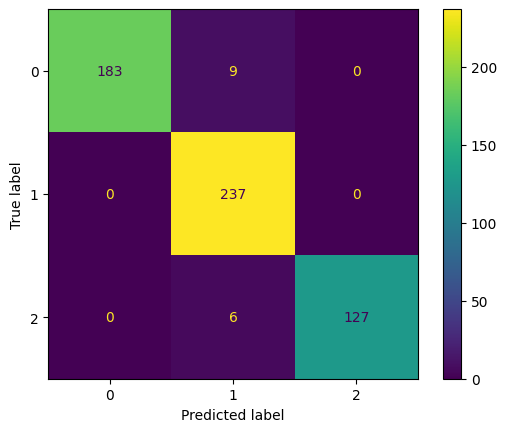

In [70]:
cm = sklearn.metrics.ConfusionMatrixDisplay.from_predictions(actual_labels, prediction_labels)    